<a href="https://colab.research.google.com/github/Jerome-Mahia/Learning-ML/blob/main/144915_Jerome_Mahia_ICS3C_Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importations**

In [2]:
!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from google.colab import files
import io

**Load Data**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Nairobi Office Price Ex.csv to Nairobi Office Price Ex.csv


**Data Exploration**

In [6]:
data = pd.read_csv(io.BytesIO(uploaded['Nairobi Office Price Ex.csv']))

In [7]:
pd.DataFrame(data)

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925
5,donholm,no,serene,no,no,yes,no,yes,55.142188,78.211518
6,langata,no,very_noisy,yes,yes,no,no,yes,52.211797,79.641973
7,langata,yes,serene,no,no,yes,yes,no,39.299567,59.171489
8,donholm,yes,semi_serene,yes,no,no,yes,no,48.105042,75.331242
9,karen,yes,serene,no,no,no,no,no,52.550014,71.300880


In [9]:
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

        LOC  FUR          AMB PROX_SCH PROX_ROAD PROX_MALL WATER HK_SER  \
0     karen  yes       serene       no       yes       yes   yes    yes   
1  madaraka  yes  semi_serene      yes       yes       yes    no     no   
2     karen   no        noisy       no       yes       yes   yes    yes   
3     karen  yes  semi_serene       no        no        no   yes    yes   
4  buruburu   no  semi_serene       no       yes       yes   yes    yes   

        SIZE      PRICE  
0  32.502345  31.707006  
1  53.426804  68.777596  
2  61.530358  62.562382  
3  47.475640  71.546632  
4  59.813208  87.230925  
         LOC  FUR          AMB PROX_SCH PROX_ROAD PROX_MALL WATER HK_SER  \
9      karen  yes       serene       no        no        no    no     no   
10  madaraka  yes        noisy      yes       yes        no   yes    yes   
11   langata   no  semi_serene      yes        no       yes   yes    yes   
12  buruburu  yes  semi_serene      yes       yes        no    no     no   
13     karen 

<function matplotlib.pyplot.show(close=None, block=None)>

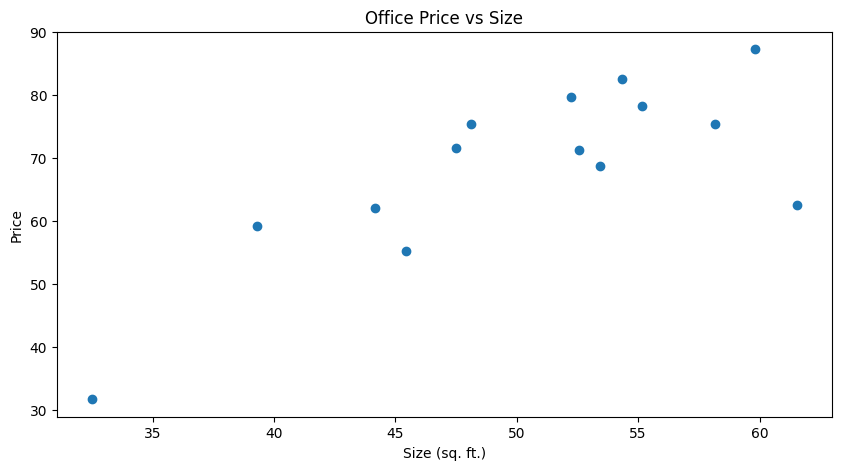

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(data['SIZE'], data['PRICE'])
plt.title('Office Price vs Size')
plt.xlabel('Size (sq. ft.)')
plt.ylabel('Price')
plt.show

**Data Preparation**

In [11]:
X = data['SIZE'].values.reshape(-1, 1)
y = data['PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Model**

In [12]:
model = Sequential([
        Dense(10, activation='relu' , input_shape=(1,)),
        Dense(10, activation='relu'),
        Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 5135.8242 - val_loss: 5936.1050
Epoch 2/50
1/1 [==============================] - 0s 45ms/step - loss: 5099.3926 - val_loss: 5898.3291
Epoch 3/50
1/1 [==============================] - 0s 43ms/step - loss: 5063.0835 - val_loss: 5860.6650
Epoch 4/50
1/1 [==============================] - 0s 43ms/step - loss: 5026.8965 - val_loss: 5823.1147
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 4990.8340 - val_loss: 5785.6797
Epoch 6/50
1/1 [==============================] - 0s 43ms/step - loss: 4954.8994 - val_loss: 5748.3604
Epoch 7/50
1/1 [==============================] - 0s 43ms/step - loss: 4919.0908 - val_loss: 5711.1567
Epoch 8/50
1/1 [==============================] - 0s 46ms/step - loss: 4883.4102 - val_loss: 5674.0698
Epoch 9/50
1/1 [==============================] - 0s 42ms/step - loss: 4847.8569 - val_loss: 5637.0977
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 481

**Evaluate Model**

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

1/1 [==============================] - 0s 119ms/step
Mean Squared Error: 3432.852614869258


**Prediction**

In [14]:
size = np.array([[50]])
predicted_price = model.predict(size)
print('Predicted Office Price for 100 sq. ft.:', predicted_price[0][0])

1/1 [==============================] - 0s 71ms/step
Predicted Office Price for 100 sq. ft.: 7.4022603
